In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
!gunzip -c ./clean-loan-data.csv.gz > ./clean-loan-data.csv

In [3]:
start_df = pd.read_csv('./clean-loan-data.csv', low_memory=False)

In [4]:
df = start_df.copy(deep=True)
df.head()

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,...,NaN,Sep,2013.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,...,NaN,Jan,2015.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [5]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns


## Missing Data


In [6]:
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 59 columns.
There are 23 columns that have missing values.


,Missing Values,% of Total Values
mths_since_last_delinq,454312,51.2
next_pymnt_month,252971,28.5
next_pymnt_year,252971,28.5
total_rev_hi_lim,70276,7.9
tot_coll_amt,70276,7.9
tot_cur_bal,70276,7.9
emp_title,51462,5.8
last_pymnt_month,17659,2.0
last_pymnt_year,17659,2.0
revol_util,502,0.1


## Exporative Analysis

## Is Balanced?

0 = No Default<br />
1 = Default


In [7]:
target_list = [1 if i=='Default' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

TARGET
0    886160
1      1219
Name: count, dtype: int64

## Data Types

Text(0, 0.5, 'Data type')

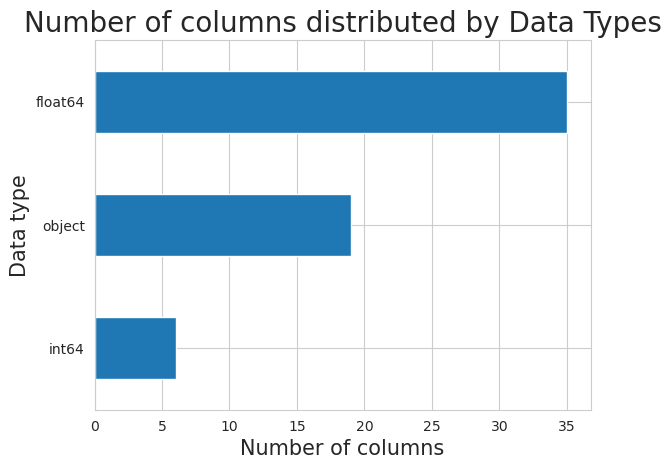

In [8]:
# Number of each type of column
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)


In [9]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

grade                          7
sub_grade                     35
emp_title                 299271
home_ownership                 6
verification_status            3
issue_month                   12
loan_status                   10
pymnt_plan                     2
url                       887379
purpose                       14
title                      63143
zip_code                     935
addr_state                    51
earliest_cr_line_month        12
initial_list_status            2
last_pymnt_month              12
next_pymnt_month              12
last_credit_pull_month        12
application_type               2
dtype: int64

## Number of loans distributed by Employment Years


/tmp/ipykernel_61/3309627399.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_length'].fillna(value=0,inplace=True)
/tmp/ipykernel_61/3309627399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

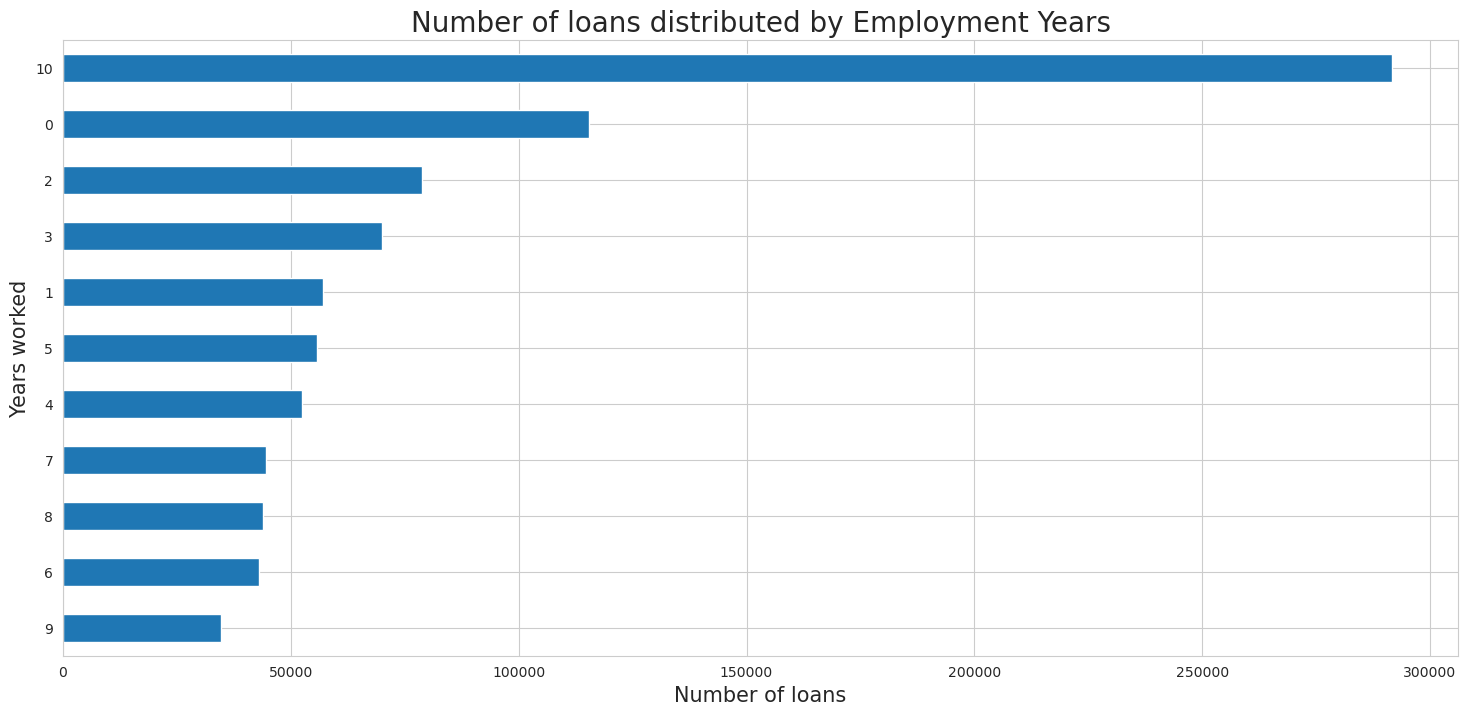

In [10]:
df['emp_length'].fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);


### Payment Plans

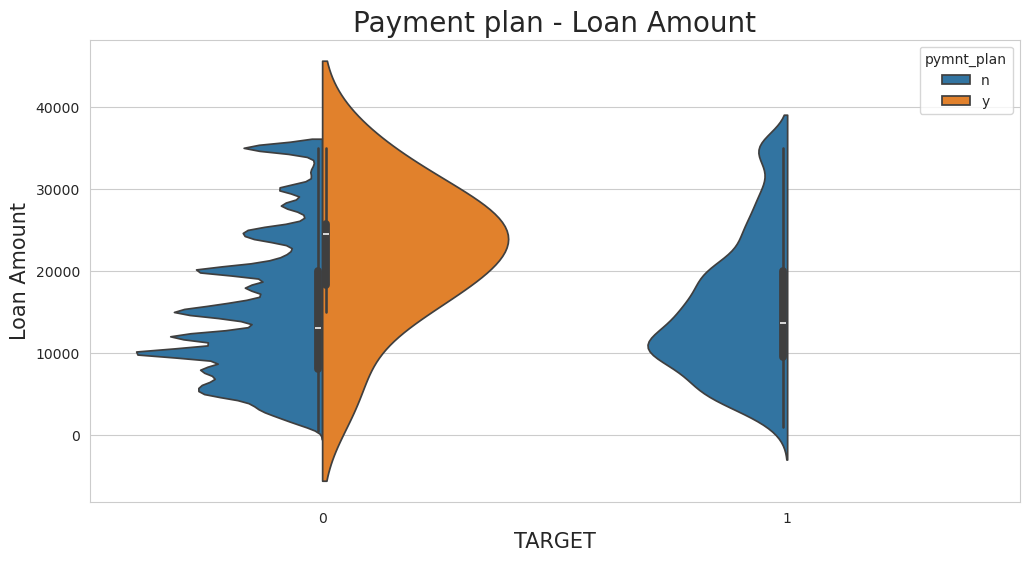

In [11]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="pymnt_plan", split=True)
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);




In [12]:
# Remove Data with more than 70% missing data

temp = [i for i in df.count()<len(df) *0.30]
df.drop(df.columns[temp],axis=1,inplace=True)

### Distribution over Interest

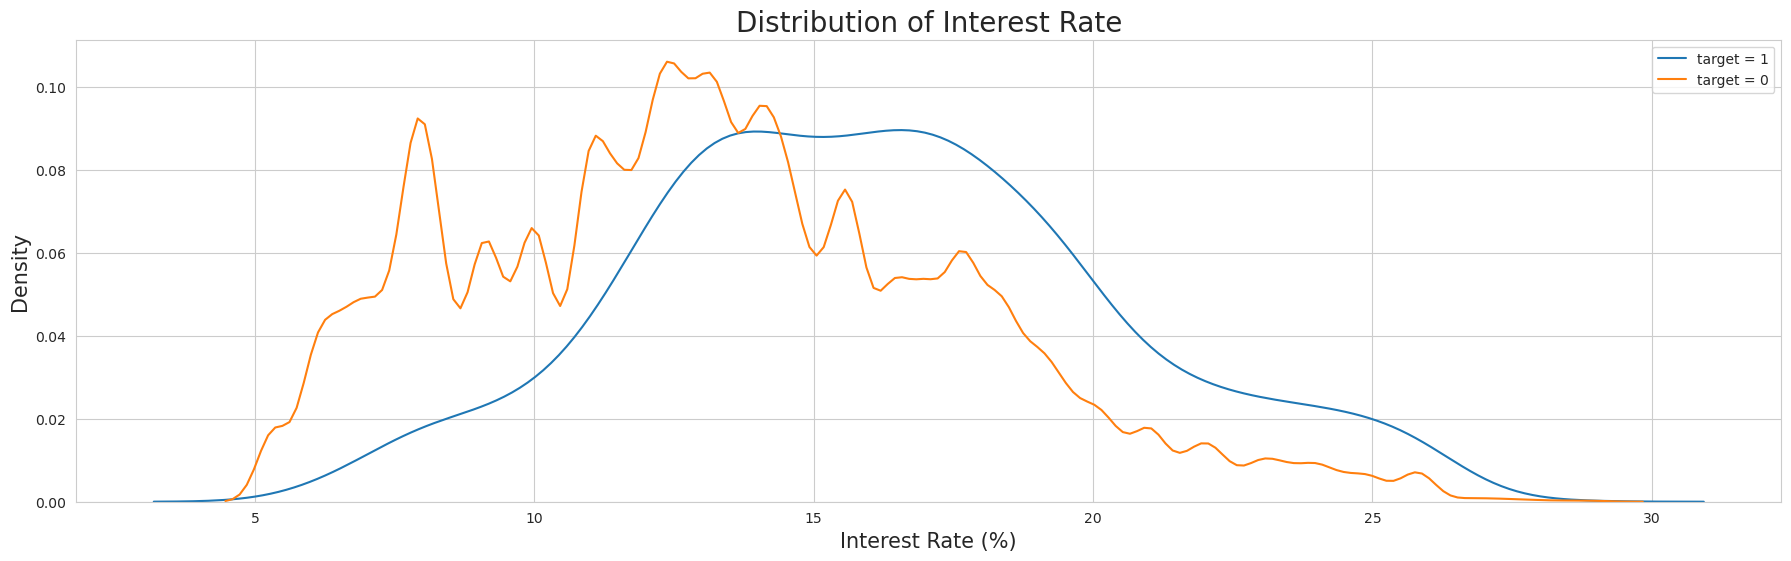

In [14]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.legend()
plt.title('Distribution of Interest Rate',fontsize=20);


### Term


/tmp/ipykernel_61/2017515538.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="term", split=True,color='pink')


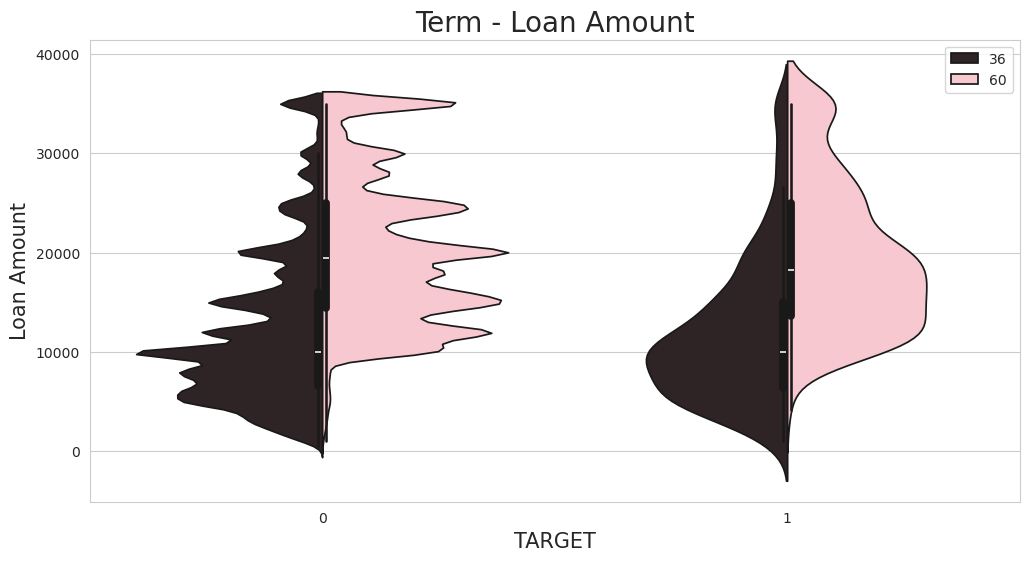

In [15]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="term", split=True,color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.legend()
plt.ylabel("Loan Amount", fontsize=15);

### Application Type


/tmp/ipykernel_61/1757853382.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="application_type", split=True,color='green')


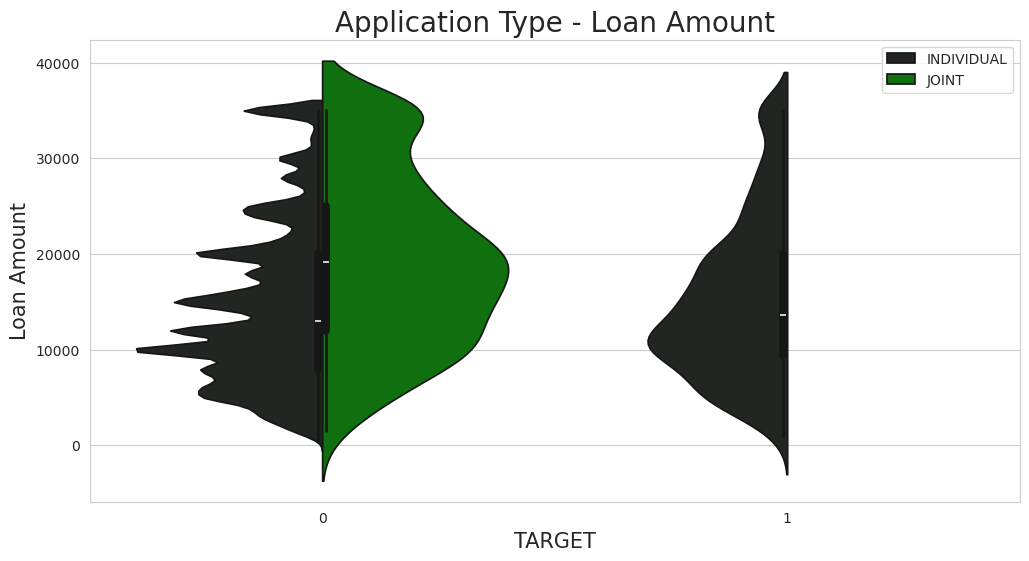

In [16]:


fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="application_type", split=True,color='green')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.legend()
plt.ylabel("Loan Amount", fontsize=15);



In [17]:
print("Number of joint loans significant?")

df['application_type'].value_counts()

Number of joint loans significant?


application_type
INDIVIDUAL    886868
JOINT            511
Name: count, dtype: int64

### Loan Grade

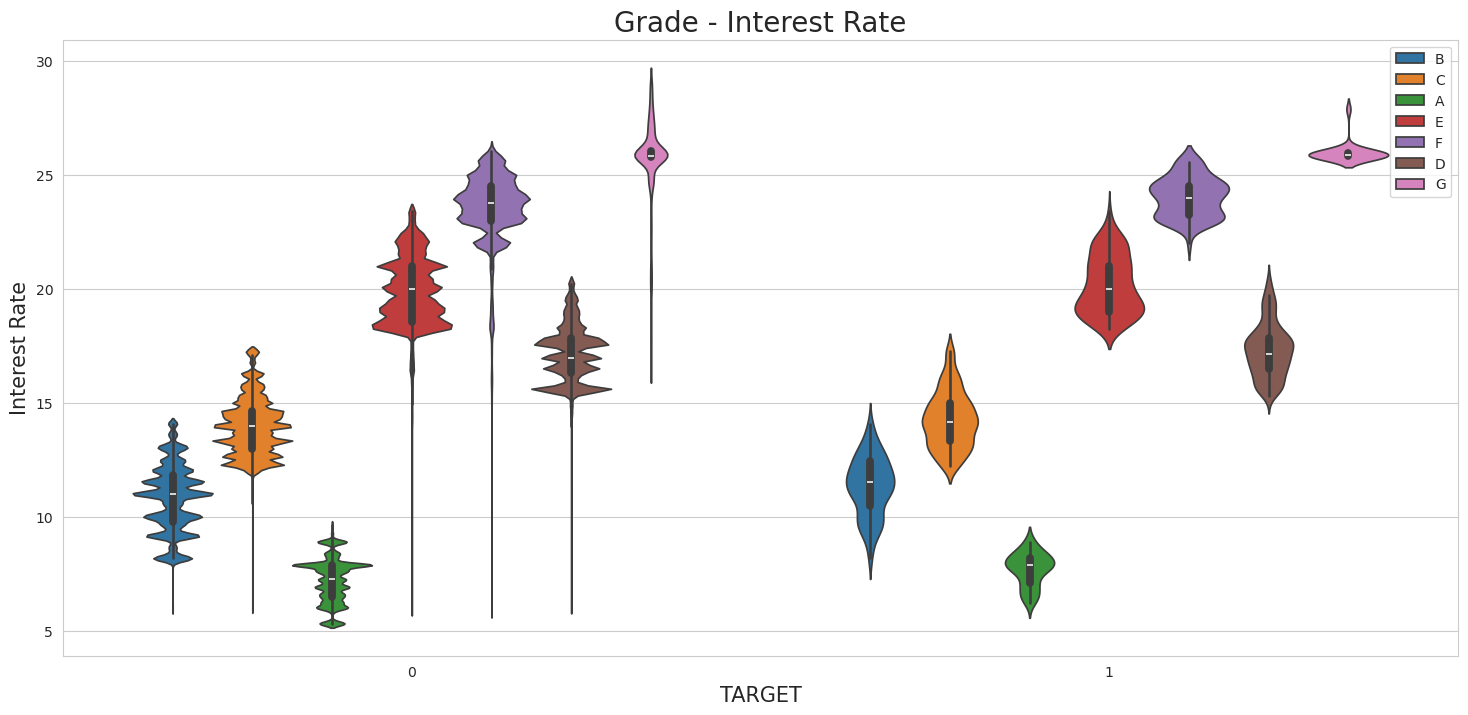

In [18]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(x="TARGET",y="int_rate",data=df, hue="grade")
plt.title("Grade - Interest Rate", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.legend()
plt.ylabel("Interest Rate", fontsize=15);



### State

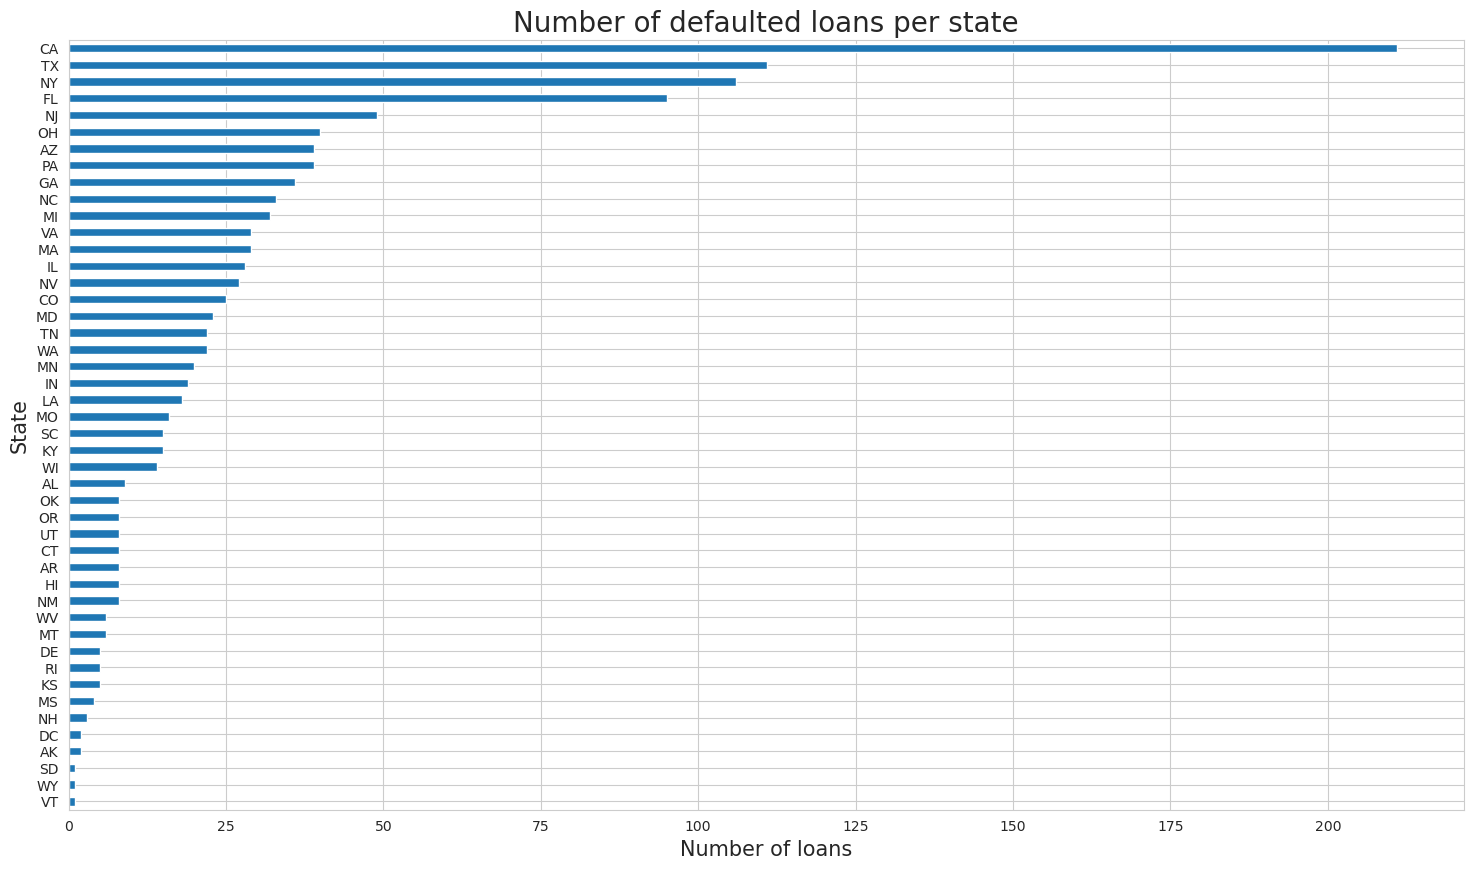

In [20]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==1].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

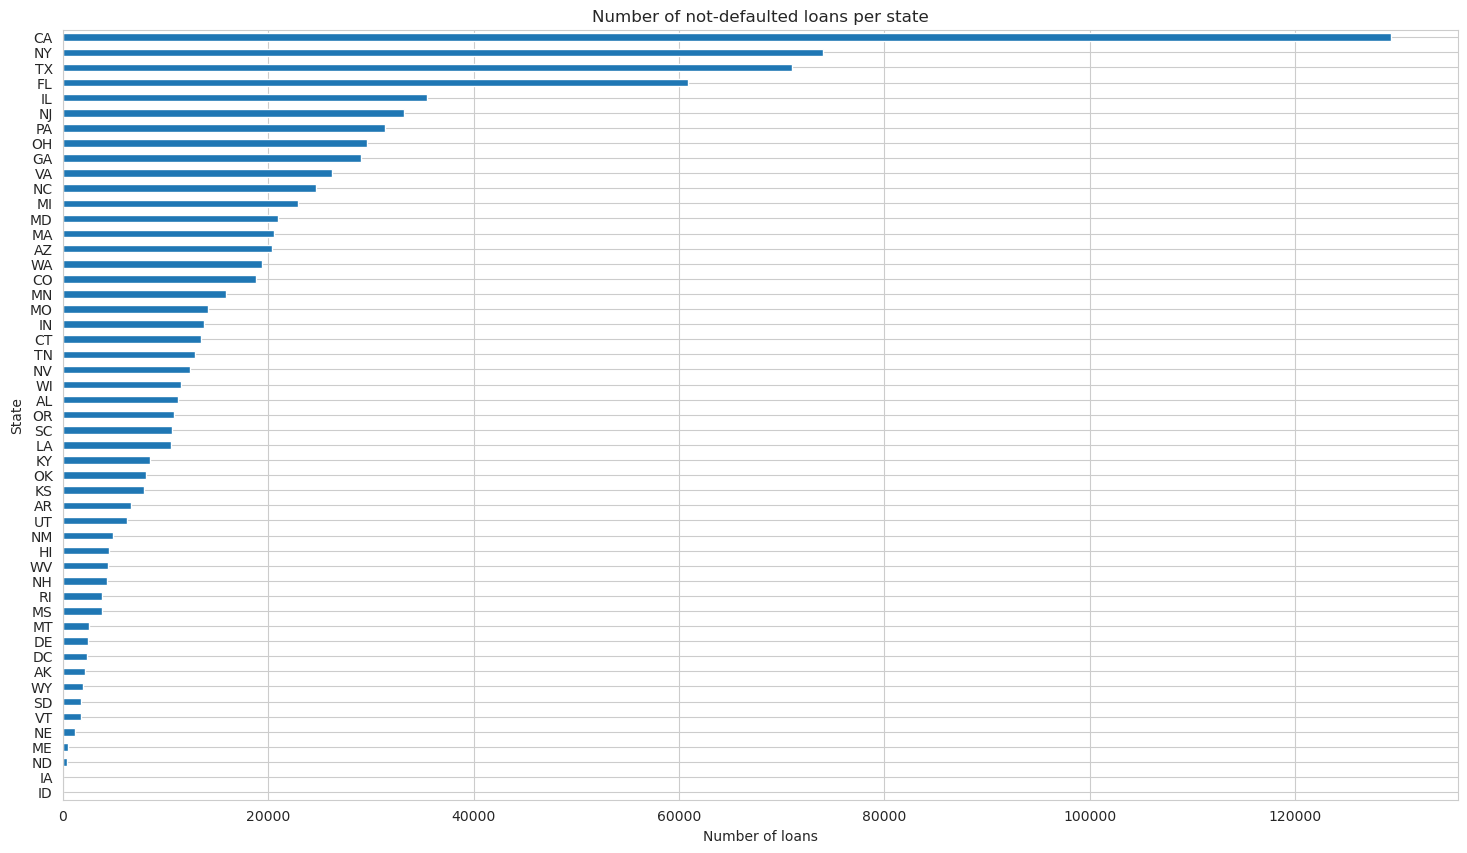

In [21]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==0].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State')
plt.xlabel('Number of loans')
plt.title('Number of not-defaulted loans per state');



## Cleanup

In [22]:
df['emp_title'].value_counts().head()

emp_title
Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Name: count, dtype: int64

In [23]:
df.drop(['id_pk', 'member_id','emp_title','title','zip_code','url'],axis=1,inplace=True)

In [24]:
df.shape

(887379, 54)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   887379 non-null  float64
 1   funded_amnt                 887379 non-null  float64
 2   funded_amnt_inv             887379 non-null  float64
 3   term                        887379 non-null  int64  
 4   int_rate                    887379 non-null  float64
 5   installment                 887379 non-null  float64
 6   grade                       887379 non-null  object 
 7   sub_grade                   887379 non-null  object 
 8   emp_length                  887379 non-null  int64  
 9   home_ownership              887379 non-null  object 
 10  annual_inc                  887375 non-null  float64
 11  verification_status         887379 non-null  object 
 12  issue_month                 887379 non-null  object 
 13  issue_year    

## Preprocess

### Date Columns

In [26]:
# df['issue_d']= pd.to_datetime(df['issue_d']).apply(lambda x: int(x.strftime('%Y')))
# df['last_pymnt_d']= pd.to_datetime(df['last_pymnt_d'].fillna('2016-01-01')).apply(lambda x: int(x.strftime('%m')))
# df['last_credit_pull_d']= pd.to_datetime(df['last_credit_pull_d'].fillna("2016-01-01")).apply(lambda x: int(x.strftime('%m')))
# df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%m')))
# df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'].fillna(value = '2016-02-01')).apply(lambda x:int(x.strftime("%Y")))



### Categorical Features

In [27]:
from sklearn import preprocessing

In [28]:
count = 0

for col in df:
    if df[col].dtype == 'object' or col == 'term':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
pymnt_plan
initial_list_status
application_type
4 columns were label encoded.


In [29]:


df = pd.get_dummies(df)
print(df.shape)



(887379, 228)


In [30]:


df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median())


df.dropna(inplace=True)




In [31]:


df.count().sort_values().head(3)



loan_amnt          610438
funded_amnt        610438
funded_amnt_inv    610438
dtype: int64

In [32]:
df['TARGET'].value_counts()

TARGET
0    609247
1      1191
Name: count, dtype: int64

## Modeling


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET',axis=1),df['TARGET'],test_size=0.15,random_state=101)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
x_train_r, y_train_r = sm.fit_resample(X_train, y_train)

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001,random_state=21)

log_reg.fit(x_train_r, y_train_r)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.0001
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
print_score(log_reg, x_train_r, y_train_r, X_test, y_test, train=False)

Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     91374
           1       1.00      1.00      1.00       192

    accuracy                           1.00     91566
   macro avg       1.00      1.00      1.00     91566
weighted avg       1.00      1.00      1.00     91566


Confusion Matrix: 
 [[91374     0]
 [    0   192]]



In [42]:
from sklearn.model_selection import cross_validate


sm = SMOTE(random_state=12)
x_train_r, y_train_r = sm.fit_resample(df.drop('TARGET',axis=1), df['TARGET'])

cross_validate(log_reg, x_train_r, y_train_r, cv=3, scoring=('accuracy', 'recall'))

/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to

{'fit_time': array([20.88348746, 19.67459416, 20.16476083]),
 'score_time': array([0.45622468, 0.45345402, 0.44471741]),
 'test_accuracy': array([0.45462066, 0.53014169, 0.60209423]),
 'test_recall': array([0.71259885, 0.71097532, 0.71433214])}

### Random Forest Classifier


In [43]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=40, random_state=21)
clf_rf.fit(x_train_r, y_train_r)

,n_estimators,40
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
print_score(clf_rf, x_train_r, y_train_r, X_test, y_test, train=False)

Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     91374
           1       1.00      1.00      1.00       192

    accuracy                           1.00     91566
   macro avg       1.00      1.00      1.00     91566
weighted avg       1.00      1.00      1.00     91566




/opt/conda/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix: 
 [[91374     0]
 [    0   192]]

